In [1]:
# Pandas for managing datasets
import pandas as pd

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Seaborn for plotting and styling
import seaborn as sns

In [6]:
# Read dataset
df = pd.read_csv('/Users/priyashaprasad/Documents/Codecademy - ML/Pokemon.csv', index_col=0)

In [7]:
# Display first 5 observations
df.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
3    Venusaur  Grass  Poison    525  80      82       83      100      100   
4  Charmander   Fire     NaN    309  39      52       43       60       50   
5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage  Legendary  
#                           
1     45      1      False  
2     60      2      False  
3     80      3      False  
4     65      1      False  
5     80      2      False

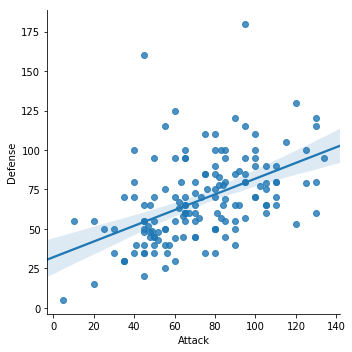

In [8]:
#Default Scatter Plot
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)

Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. 
We actually used Seaborn's function for fitting and plotting a regression line.

Here's how we can tweak the lmplot():

First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

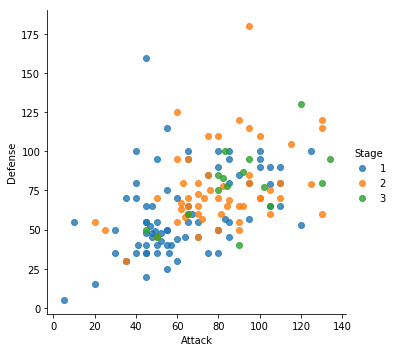

In [9]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

If the axis is not zero, then we can use Matplotlib to set the origins to be at zero.

Seaborn is a high-level interface to Matplotlib. 

Setting your axes limits is one of those times, but the process is pretty simple:

First, invoke your Seaborn plotting function as normal.
Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.

# Plot using Seaborn
sns.lmplot(x='Attack', 

           y='Defense', data=df,
           
           fit_reg=False, 
           
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)

plt.xlim(0, None)

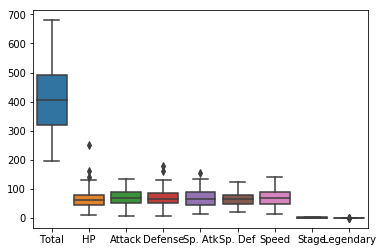

In [10]:
# Boxplot
sns.boxplot(data=df)

Well, that's a reasonable start, but there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.
In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:

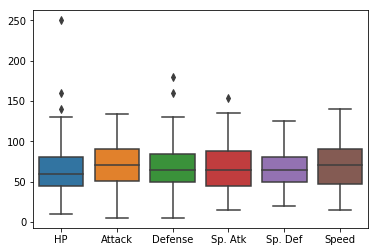

In [11]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

Next, we'll change the theme to 'whitegrid' while making a violin plot.

Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.

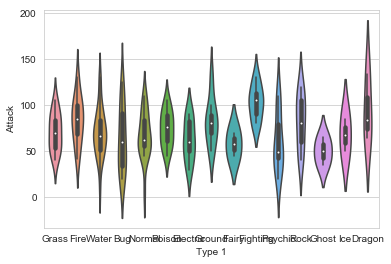

In [12]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

In [13]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

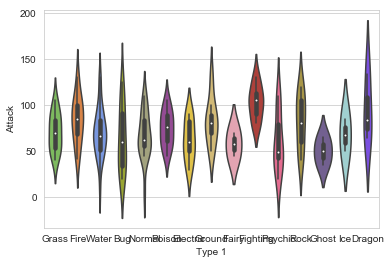

In [14]:
# Violin plot with Pokemon custom color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

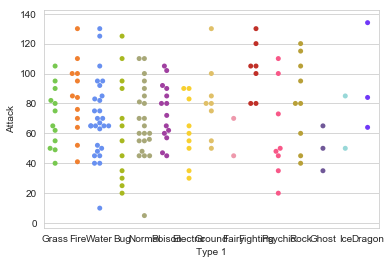

In [15]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Overlaying Plots
It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

Text(0.5,1,'Attack by Type')

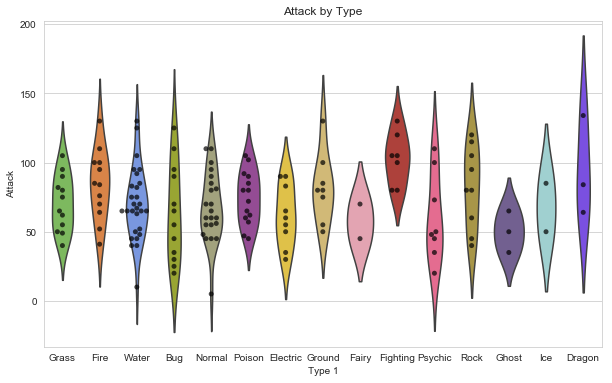

In [16]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [17]:
stats_df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
#                                                                         
1   Bulbasaur  Grass  Poison  45      49       49       65       65     45
2     Ivysaur  Grass  Poison  60      62       63       80       80     60
3    Venusaur  Grass  Poison  80      82       83      100      100     80
4  Charmander   Fire     NaN  39      52       43       60       50     65
5  Charmeleon   Fire     NaN  58      64       58       80       65     80

As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

In [18]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58

All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In [19]:
print( stats_df.shape )
print( melted_df.shape )
# (151, 9)
# (906, 5)

(151, 9)
(906, 5)


Now we can make a swarm plot with melted_df.

But this time, we're going to set x='Stat' and y='value' so our swarms are separated by stat.
Then, we'll set hue='Type 1' to color our points by the Pokémon type.

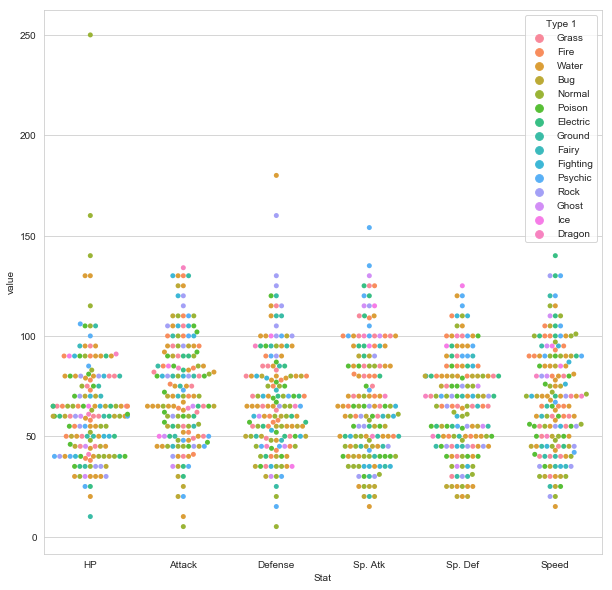

In [22]:
# Swarmplot with melted_df
plt.figure(figsize=(10,10))
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

Finally, let's make a few final tweaks for a more readable chart:

Enlarge the plot.
Separate points by hue using the argument split=True .
Use our custom Pokemon color palette.
Adjust the y-axis limits to end at 0.
Place the legend to the right.

//anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


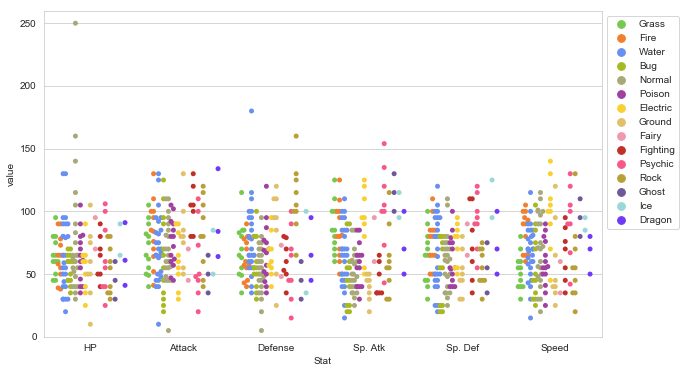

In [23]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

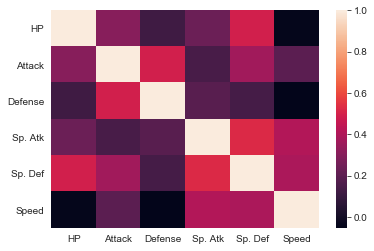

In [24]:

# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

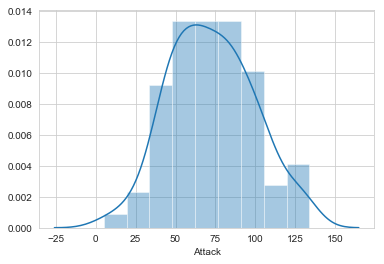

In [25]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

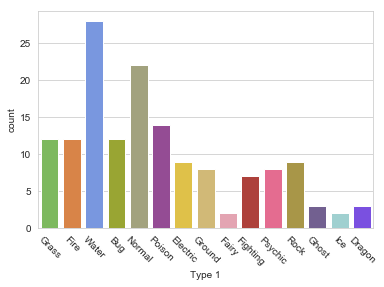

In [26]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

//anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


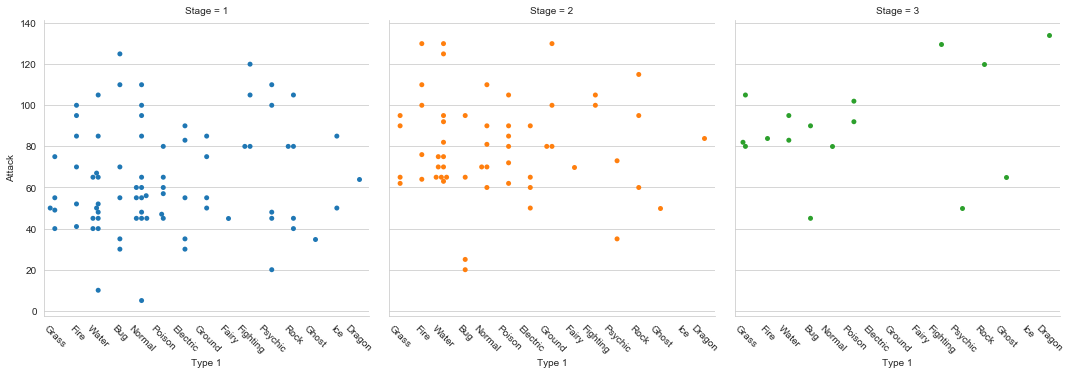

In [27]:
# Factor Plot - Factor plots make it easy to separate plots by categorical classes.
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

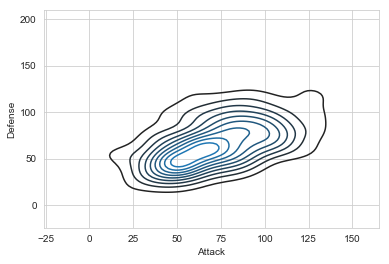

In [29]:
#Density Plot - Density plots display the distribution between two variables.

#Tip: Consider overlaying this with a scatter plot.
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

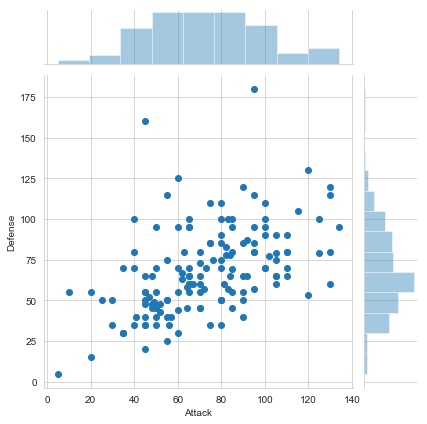

In [30]:
#Joint Distribution Plot


#Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)